# 0.9_ss_chap6_init_compare_mnist
- activationの中身をmnistで見ていく

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [20]:
from src import utils
import itertools
import logging
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as patches
from collections import OrderedDict
import sys
from time import sleep
from tqdm import tqdm
%matplotlib inline

In [4]:
from src.ch06.weight_init_compare import main
from src.dataset.mnist import load_mnist
from src.common.util import smooth_curve
from src.common.multi_layer_net import MultiLayerNet
from src.common.optimizer import SGD

In [5]:
log_fmt = '%(asctime)s - %(name)s - %(levelname)s - %(message)s'
logging.basicConfig(level=logging.INFO, format=log_fmt)
# logging.basicConfig(level=logging.DEBUG, format=log_fmt)
logger = logging.getLogger()

## From init compare mnist

2018-11-23 11:05:08,444 - src.ch06.weight_init_compare - INFO - # 0:MNISTデータの読み込み==========
2018-11-23 11:05:08,743 - src.ch06.weight_init_compare - INFO - # 1:実験の設定==========
2018-11-23 11:05:08,807 - src.ch06.weight_init_compare - INFO - # 2:訓練の開始==========
2018-11-23 11:05:41,481 - src.ch06.weight_init_compare - INFO - # 3.グラフの描画==========


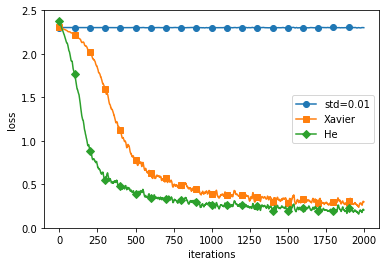

In [6]:
main()

## 自分で書く

In [7]:
weight_init_types = {'std=0.01': 0.01,
                    'Xavier': 'sigmoid',
                    'He': 'relu'}

optimizer = SGD(lr=0.01)

In [8]:
logger.info("# 0:MNISTデータの読み込み==========")
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

2018-11-23 11:05:46,168 - root - INFO - # 0:MNISTデータの読み込み==========


In [9]:
logger.info("# 1:実験の設定==========")
weight_type = 0.01
key = 'std=0.01'

2018-11-23 11:05:47,322 - root - INFO - # 1:実験の設定==========


In [25]:
logger.info("# 2:訓練の開始==========")
train_loss = []

# Iterations
with tqdm(total=max_iterations, file=sys.stdout) as pbar:
        for i in range(max_iterations):
                pbar.update(1)
                batch_mask = np.random.choice(train_size, batch_size)
                x_batch = x_train[batch_mask]
                t_batch = t_train[batch_mask]
                grads = network.gradient(x_batch, t_batch)
                optimizer.update(network.params, grads)
                loss = network.loss(x_batch, t_batch)
                train_loss.append(loss)

2018-11-23 11:11:41,832 - root - INFO - # 2:訓練の開始==========


100%|██████████| 2000/2000 [00:12<00:00, 157.69it/s]


In [35]:
def train_network(weight_type, 
                 batch_size=128, max_iterations=2000,
                 input_size=784,
                 hidden_size_list=[100,100,100,100],
                 output_size=10):
        ''' Return train loss
        With different intial values
        '''
        # データの取得
        (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
        train_size = x_train.shape[0]
        
        # 初期化
        network = MultiLayerNet(input_size=input_size,
                                hidden_size_list=hidden_size_list, 
                                output_size=output_size, 
                                weight_init_std=weight_type)
        
        logger.info("# 2:訓練の開始==========")
        train_loss = []

        # Iterations
        with tqdm(total=max_iterations, file=sys.stdout) as pbar:
                for i in range(max_iterations):
                        pbar.update(1)
                        # get batch
                        batch_mask = np.random.choice(train_size, 
                                                      batch_size)
                        x_batch = x_train[batch_mask]
                        t_batch = t_train[batch_mask]
                        
                        # calculate grads
                        grads = network.gradient(x_batch, t_batch)
                        optimizer.update(network.params, grads)
                        
                        # get loss
                        loss = network.loss(x_batch, t_batch)
                        train_loss.append(loss)
        
        return train_loss

## Loop

In [36]:
weight_init_types = {'std=0.01': 0.01,
                    'Xavier': 'sigmoid',
                    'He': 'relu'}

In [37]:
train_losses = {}
for key in weight_init_types:
        weight_type = weight_init_types[key]
        train_losses[key] = train_network(weight_type)

2018-11-23 11:21:03,012 - root - INFO - # 2:訓練の開始==========


100%|██████████| 2000/2000 [00:11<00:00, 174.99it/s]


2018-11-23 11:21:14,640 - root - INFO - # 2:訓練の開始==========


100%|██████████| 2000/2000 [00:11<00:00, 172.42it/s]


2018-11-23 11:21:26,438 - root - INFO - # 2:訓練の開始==========


100%|██████████| 2000/2000 [00:11<00:00, 168.32it/s]


## Plot

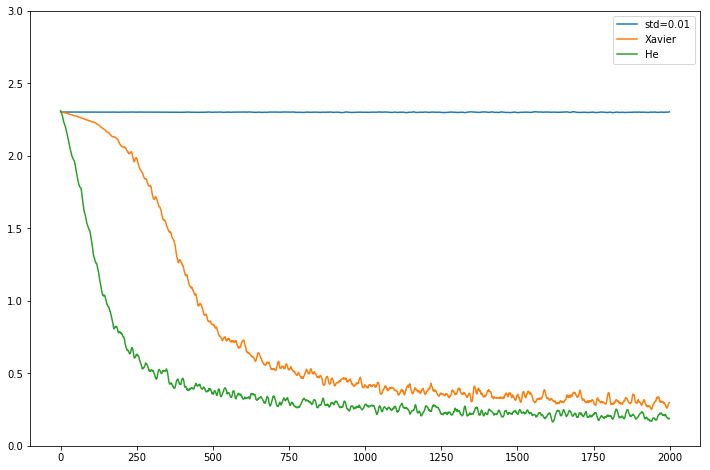

In [40]:
fig, ax = plt.subplots(figsize=(12, 8))
for key in weight_init_types.keys():
        x = np.arange(len(train_losses[key]))
        plt.plot(x, smooth_curve(train_losses[key]), label=key,
                 markevery=100)
        plt.ylim(0, 3)
        plt.legend()